ANOVA of food groups based on The Banana Index dataset

Data set: https://www.kaggle.com/datasets/joebeachcapital/banana-index

The Economist and Solstad, S. (corresponding author), 2023. The Economist's Banana index.

First published in the article "A different way to measure the climate impact of food", The Economist, April 11, 2023.

In [204]:
import pandas as pd
pd.options.mode.chained_assignment = None
url = 'https://raw.githubusercontent.com/A-Bin1/Statistical-Samples/main/banana_index_data.csv'
food_df = pd.read_csv(url)

<!-- greenhouse-gas emissions of foods by weight, calorie, or protein equivalent in bananas.
ex: banana = 7.72 CO-2 equivalents per 100 grams of protein
    apple juice = 29.15 CO-2 per 100 grams of protein.
    banana index score per 100 grams of protein = 3.78 -->

In [205]:
food_df.head()

,entity,year,emissions_kg,emissions_1000kcal,emissions_100g_protein,emissions_100g_fat,land_use_kg,land_use_1000kcal,Land use per 100 grams of protein,Land use per 100 grams of fat,Bananas index (kg),Bananas index (1000 kcalories),Bananas index (100g protein),Chart?,type,Banana values,Unnamed: 16
0,Ale,2022,0.488690,0.317338,0.878525,2.424209,0.811485,0.601152,1.577687,3.065766,0.559558,0.362340,0.113771,True,1,Per KG,0.873350
1,Almond butter,2022,0.387011,0.067265,0.207599,0.079103,7.683045,1.296870,3.608433,1.495297,0.443134,0.076804,0.026885,True,1,Per 1000 kcalories,0.875803
2,Almond milk,2022,0.655888,2.222230,13.595512,4.057470,1.370106,2.675063,12.687839,4.600530,0.751002,2.537364,1.760651,True,1,Per 100g protein,7.721869
3,Almonds,2022,0.602368,0.105029,0.328335,0.119361,8.230927,1.423376,4.261040,1.610136,0.689721,0.119923,0.042520,True,1,NaN,NaN
4,Apple juice,2022,0.458378,0.955184,29.152212,19.754980,0.660629,1.382839,43.232158,26.246743,0.524851,1.090638,3.775280,True,1,NaN,NaN


In [206]:
#remove misc columns
food_df.drop(['type', 'Chart?', 'Banana values', 'Unnamed: 16'],axis=1, inplace=True)

In [207]:
food_df.head()

,entity,year,emissions_kg,emissions_1000kcal,emissions_100g_protein,emissions_100g_fat,land_use_kg,land_use_1000kcal,Land use per 100 grams of protein,Land use per 100 grams of fat,Bananas index (kg),Bananas index (1000 kcalories),Bananas index (100g protein)
0,Ale,2022,0.488690,0.317338,0.878525,2.424209,0.811485,0.601152,1.577687,3.065766,0.559558,0.362340,0.113771
1,Almond butter,2022,0.387011,0.067265,0.207599,0.079103,7.683045,1.296870,3.608433,1.495297,0.443134,0.076804,0.026885
2,Almond milk,2022,0.655888,2.222230,13.595512,4.057470,1.370106,2.675063,12.687839,4.600530,0.751002,2.537364,1.760651
3,Almonds,2022,0.602368,0.105029,0.328335,0.119361,8.230927,1.423376,4.261040,1.610136,0.689721,0.119923,0.042520
4,Apple juice,2022,0.458378,0.955184,29.152212,19.754980,0.660629,1.382839,43.232158,26.246743,0.524851,1.090638,3.775280


ANOVA among subcategories of food groups: is there a siginificant difference in their mean banana index?

In [208]:
#partition data into appropriate categories
#emissions per x number of kg, protein, kcal, and the banana index gives us proportion and ability to have
#equal sample sizes to perform ANOVA correctly.

#using regex to separate into categories
import regex as re
def find_phrase(p):
    return(lambda x: re.findall(r'{}'.format(p), x))

def get_phrase_count(phrase, data, col):
    phrase_results = data[col].apply(find_phrase(phrase))
    phraselist = list(filter(None, phrase_results))
    phraseCount = len(phraselist)
    return phraseCount

In [209]:
#find count of cheese - subgroups of cheese exist but all of them are still considered the food type cheese.
get_phrase_count('cheese', food_df, 'entity')

11

In [210]:
#find all records based on partial match of text field
def get_df_record(phrase, data, col):
    phrase_results = data[col].apply(find_phrase(r'{}'.format(phrase)))
    phrase_bool = pd.Series([bool(x) for x in phrase_results], index = data.index)
    df_recs = data[phrase_bool]
    return df_recs

In [211]:
#get df records of cheese
get_df_record("cheese", food_df, 'entity')

,entity,year,emissions_kg,emissions_1000kcal,emissions_100g_protein,emissions_100g_fat,land_use_kg,land_use_1000kcal,Land use per 100 grams of protein,Land use per 100 grams of fat,Bananas index (kg),Bananas index (1000 kcalories),Bananas index (100g protein)
22,Blue cheese,2022,20.105753,6.113389,14.046817,7.243054,23.892146,7.249884,16.395390,8.581762,23.021427,6.980327,1.819096
37,Cheddar cheese,2022,20.749045,5.406193,8.721144,6.693239,24.451037,6.353026,11.783915,7.830016,23.758006,6.172845,1.129409
50,Chocolate cheesecake,2022,4.900424,1.198627,10.409508,1.922302,6.511175,1.592635,13.830795,2.554226,5.611068,1.368605,1.348056
57,Cottage cheese,2022,25.278503,29.346968,22.337566,244.477973,29.915060,34.694337,26.410036,288.289479,28.944313,33.508657,2.892767
70,Feta cheese,2022,14.838609,5.042113,8.418578,5.984398,17.472121,5.934872,9.907002,7.044679,16.990458,5.757135,1.090225
78,Goat’s cheese,2022,19.312073,6.220251,12.548149,7.478561,22.617936,7.295756,14.445831,8.773460,22.112650,7.102344,1.625015
81,Halloumi cheese,2022,16.172452,5.282519,7.035951,7.141841,19.101111,6.247765,8.302601,8.456865,18.517731,6.031632,0.911172
93,Macaroni cheese,2022,16.849313,5.245219,9.361866,7.742616,20.686935,6.597463,12.132912,10.102668,19.292748,5.989042,1.212383
101,Mozzarella cheese,2022,16.233200,6.764520,8.797819,9.417882,19.061286,7.936335,10.341435,11.016421,18.587288,7.723795,1.139338
113,Parmesan cheese,2022,24.016480,6.369095,8.438339,8.307382,28.249496,7.495260,9.939259,9.773975,27.499275,7.272295,1.092785


Regex was close, but chocolate cheesecake and macaroni cheese will be omitted from this list.

In [212]:
#store in df first and then delete chocolate cheesecake record
cheese_df = get_df_record("cheese", food_df, 'entity')

In [213]:
cheese_df.drop(cheese_df.loc[cheese_df['entity']=='Chocolate cheesecake'].index, inplace=True)
cheese_df.drop(cheese_df.loc[cheese_df['entity']=='Macaroni cheese'].index, inplace=True)

In [214]:
cheese_df.head()

,entity,year,emissions_kg,emissions_1000kcal,emissions_100g_protein,emissions_100g_fat,land_use_kg,land_use_1000kcal,Land use per 100 grams of protein,Land use per 100 grams of fat,Bananas index (kg),Bananas index (1000 kcalories),Bananas index (100g protein)
22,Blue cheese,2022,20.105753,6.113389,14.046817,7.243054,23.892146,7.249884,16.395390,8.581762,23.021427,6.980327,1.819096
37,Cheddar cheese,2022,20.749045,5.406193,8.721144,6.693239,24.451037,6.353026,11.783915,7.830016,23.758006,6.172845,1.129409
57,Cottage cheese,2022,25.278503,29.346968,22.337566,244.477973,29.915060,34.694337,26.410036,288.289479,28.944313,33.508657,2.892767
70,Feta cheese,2022,14.838609,5.042113,8.418578,5.984398,17.472121,5.934872,9.907002,7.044679,16.990458,5.757135,1.090225
78,Goat’s cheese,2022,19.312073,6.220251,12.548149,7.478561,22.617936,7.295756,14.445831,8.773460,22.112650,7.102344,1.625015


In [216]:
#perform anova based on hard vs soft cheese - banana index per 100g of Protein
#average per 100g of protein (sample size n=100)
#number of cheeses must be the same per group. Omitting blue cheese, generic goat cheese, and cottage cheese to keep
#sample sizes even and remove potential overlap/bias in cheese type.
#p value: 0.05

cheese_df.drop(cheese_df.loc[cheese_df['entity']=="Goat's cheese"].index, inplace=True)
cheese_df.drop(cheese_df.loc[cheese_df['entity']=='Blue cheese'].index, inplace=True)
cheese_df.drop(cheese_df.loc[cheese_df['entity']=='Cottage cheese'].index, inplace=True)

hard_cheese = ['Halloumi cheese',  'Cheddar cheese', 'Parmesan cheese']
soft_cheese = ['Feta cheese', 'Ricotta cheese', 'Mozzarella cheese']

import numpy as np
cheese_df['CheeseType'] = np.where(cheese_df['entity'].isin(hard_cheese), 'Hard', 'Soft')


In [217]:
cheese_df.head()

,entity,year,emissions_kg,emissions_1000kcal,emissions_100g_protein,emissions_100g_fat,land_use_kg,land_use_1000kcal,Land use per 100 grams of protein,Land use per 100 grams of fat,Bananas index (kg),Bananas index (1000 kcalories),Bananas index (100g protein),CheeseType
37,Cheddar cheese,2022,20.749045,5.406193,8.721144,6.693239,24.451037,6.353026,11.783915,7.830016,23.758006,6.172845,1.129409,Hard
70,Feta cheese,2022,14.838609,5.042113,8.418578,5.984398,17.472121,5.934872,9.907002,7.044679,16.990458,5.757135,1.090225,Soft
78,Goat’s cheese,2022,19.312073,6.220251,12.548149,7.478561,22.617936,7.295756,14.445831,8.773460,22.112650,7.102344,1.625015,Soft
81,Halloumi cheese,2022,16.172452,5.282519,7.035951,7.141841,19.101111,6.247765,8.302601,8.456865,18.517731,6.031632,0.911172,Hard
101,Mozzarella cheese,2022,16.233200,6.764520,8.797819,9.417882,19.061286,7.936335,10.341435,11.016421,18.587288,7.723795,1.139338,Soft


In [218]:
cheese_df = cheese_df.rename(columns={'Bananas index (100g protein)': 'Bananas_Index_100g_Protein' })

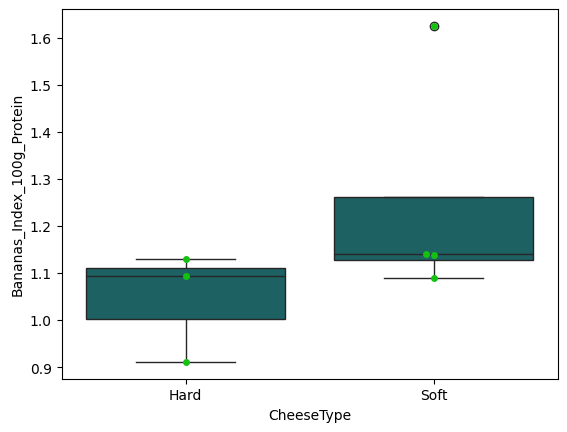

In [219]:
#box plot the data
import matplotlib.pyplot as plt
import seaborn as sns
sns.boxplot(x='CheeseType', y='Bananas_Index_100g_Protein', data=cheese_df, color='#116c6e')
sns.swarmplot(x="CheeseType", y="Bananas_Index_100g_Protein", data=cheese_df, color='#14c010')
plt.show()

In [220]:
import statsmodels.api as sm
from statsmodels.formula.api import ols

mod = ols('Bananas_Index_100g_Protein ~ CheeseType', data=cheese_df).fit()
aov_table = sm.stats.anova_lm(mod, typ=2)

In [221]:
print(aov_table)

             sum_sq   df         F    PR(>F)
CheeseType  0.07145  1.0  1.639882  0.256526
Residual    0.21785  5.0       NaN       NaN


The p value > 0.05 and we therefore fail to reject the null hypothesis.

In [222]:
#Perform ANOVA simulation based on meals using banana index as conversion metric
#Bananas index (1000 kcalories)
#proportion list of food items to equal 1000 kcalories to represent one meal
#start with generating random sampling of m food items for n meals
import random

def get_meal_list(msize, data, nmeal):
    food_list = list(data['entity'])
    meal_list = []
    for m in range(nmeal):
        meal = random.sample(food_list, msize)
        meal_list.append(meal)
        for i in meal:
            if i in food_list: food_list.remove(i)
    return meal_list

In [223]:
meal_list = get_meal_list(5, food_df, 3)

In [224]:
#return meal1
meal_list[1]

['Cauliflower', 'Sunflower oil', 'Ricotta cheese', 'Caesar salad', 'Granola']

In [225]:
#create nested dictionary and filter for new df
#create column based on the number of meals generated for anova
#proportion each meal into 1000 kcal banana index metric conversion
#perform anova simulation
import statsmodels.api as sm
from statsmodels.formula.api import ols

def anova_meal_simulation(data, meals):
    n = len(meals)
    keys= ['meal{}'.format(i+1) for i in range(n)]
    items = [[i for i in l] for l in meals]
    items_flat = [i for l in items for i in l]
    d = dict(zip(keys, items))
    df = pd.DataFrame.from_dict(d)
    df_mlt = df.melt(var_name= 'mealNum', value_name='food')
    new_df = data.loc[data['entity'].isin(items_flat)]
    new_df['mealNum'] = list(df_mlt['mealNum'])
    new_df['meal_banana_index_1000kcal'] = new_df['Bananas index (1000 kcalories)']/(len(items_flat)/n)
    mod = ols('meal_banana_index_1000kcal ~ mealNum', data=new_df).fit()
    aov_table = sm.stats.anova_lm(mod, typ=2)
    return aov_table
    
anova_meal_simulation(food_df, meal_list)



,sum_sq,df,F,PR(>F)
mealNum,3.918386,2.0,0.933085,0.420096
Residual,25.196318,12.0,NaN,NaN


Compute k number of trials and return p values < 0.05 and the corresponding meals.

In [226]:
def get_pval_results(n):
    pvals = []
    meals = []
    for i in range(n):
        meal_list = get_meal_list(5, food_df, 3)
        df = anova_meal_simulation(food_df, meal_list)
        pvals.append(df.iloc[0][3])
        meals.append(meal_list)
    keys= ['meal_group{}'.format(i) for i in range(len(meals))]
    items = [[i for i in l] for l in meals]
    d = dict(zip(keys, items))
    for p in pvals:
         if p < 0.05:
             print(p , d['meal_group{}'.format(pvals.index(p))])



In [233]:
get_pval_results(25)

0.02342038178619478 [['Muffins', 'Chilli con carne', 'Banana loaf', 'Brie', 'Almond milk'], ['Cod fish fingers', 'Cheddar cheese', 'Rice', 'Pitta bread', 'Sponge cake'], ['Mozzarella cheese', 'Biscuits', 'Frozen potato wedges', 'Sunflower seeds', 'Ale']]
